In [1]:
import pandas as pd
import clean_tweets_dataframe

In [2]:
# Function: takes a csv file path and reads it into a dataframe
def read_final_data(csv_path):
    try:
        df = pd.read_csv(csv_path)
        print("File is successfully read as csv")
        return df
    except FileNotFoundError:
        print("File Not Found!")

In [3]:
# Reading the cleaned and final data "clean_tweets"
df = read_final_data('cleaned_tweets.csv')

File is successfully read as csv


In [4]:
# View overall insights about the columns of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          21997 non-null  object 
 1   source              21997 non-null  object 
 2   original_text       21997 non-null  object 
 3   polarity            21997 non-null  float64
 4   subjectivity        21997 non-null  float64
 5   lang                21997 non-null  object 
 6   favorite_count      21997 non-null  int64  
 7   retweet_count       17257 non-null  float64
 8   original_author     21997 non-null  object 
 9   followers_count     21997 non-null  int64  
 10  friends_count       21997 non-null  int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            19138 non-null  object 
 13  user_mentions       18695 non-null  object 
 14  place               12106 non-null  object 
 15  friends_count       21997 non-null  float64
dtypes: f

In [5]:
# Expose(view) the first 10 lines of the data
df.head(10)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,friends_count
0,2022-08-07 22:31:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,4,2.0,i_ameztoy,20497,2621,NaN,City,i_ameztoy,NaN,-1.250000e-01
1,2022-08-07 22:31:16+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,691,201.0,ZIisq,65,272,NaN,China Taiwan,IndoPac_Info,NaN,-1.000000e-01
2,2022-08-07 22:31:07+00:00,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,NaN,Fin21Free,85,392,NaN,XiJinping,ZelenskyyUa,Netherlands,0.000000e+00
3,2022-08-07 22:31:06+00:00,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,NaN,Fin21Free,85,392,NaN,XiJinping,NaN,Netherlands,1.000000e-01
4,2022-08-07 22:31:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,1521,381.0,VizziniDolores,910,2608,NaN,NaN,ChinaUncensored,"Ayent, Schweiz",-6.938894e-18
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,2.000000e-01,0.500000,en,116,36.0,GraceCh15554845,207,54,NaN,Taiwan,benedictrogers,"Melbourne, Victoria",2.000000e-01
6,2022-08-07 22:30:59+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @TGTM_Official: What kind of country can co...,1.583333e-01,0.800000,en,1106,411.0,Philipkuma1,12,264,NaN,Taiwan TsaiIngwen,TGTM_Official,NaN,1.583333e-01
7,2022-08-07 22:30:59+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @ChinaInfo777: #PinkFloyd singer Roger Wate...,0.000000e+00,0.000000,en,10,5.0,nhohn2011,870,508,NaN,PinkFloyd Taiwan China,ChinaInfo777,"Florida, USA",0.000000e+00
8,2022-08-07 22:30:50+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @AmbQinGang: China's SC&amp;FM Wang Yi elab...,0.000000e+00,0.000000,en,1221,239.0,ClaudioColomaRI,127,263,NaN,Taiwan,AmbQinGang,El mundo periférico,0.000000e+00
9,2022-08-07 22:30:45+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @CGMeifangZhang: Chinese ambassador to the ...,2.000000e-01,0.375000,en,49,25.0,jmarzola1,213,877,NaN,USA Pelosi Taiwan China,CGMeifangZhang,NaN,2.000000e-01


In [6]:
# Inspecting some columns of the data randomly
df['followers_count']
df['followers_count'].value_counts

<bound method IndexOpsMixin.value_counts of 0        20497
1           65
2           85
3           85
4          910
         ...  
21992       62
21993       94
21994       88
21995      537
21996       62
Name: followers_count, Length: 21997, dtype: int64>

In [7]:
# Check if there are any null values and print the sum
total_null_inorginal_text = df['original_text'].isnull().sum()
total_null_inpolarity = df['polarity'].isnull().sum()

print(f'Total null values in oringal_text column: {total_null_inorginal_text}')
print(f'Total null values in polarity cloumn: {total_null_inpolarity}')

Total null values in oringal_text column: 0
Total null values in polarity cloumn: 0


In [8]:
# Count the number of english language tweets
df['lang'].value_counts()

en    21997
Name: lang, dtype: int64

In [9]:
# Create cleanedTweet dataframe
cleanedTweet = pd.DataFrame(columns = ['clean_text', 'polarity'])

cleanedTweet['clean_text'] = df['original_text']
cleanedTweet['polarity'] = df['polarity']
cleanedTweet.dropna(inplace = True)

In [10]:
#Check for null values in the new dataframe
cleanedTweet.isnull().sum()

clean_text    0
polarity      0
dtype: int64

In [11]:
import re

In [12]:
# Removal of unwanted characters from the tweet like @,#,links, mentions and RTs
def tweetcleaner(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove mentions
    text = re.sub(r'#', '', text) #Removing the '#' symbol
    text = re.sub(r'RT[\S]+', '', text) #Removing the RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Removing the hyper links
    text = re.sub(r'[^\w\s]', '', text) #Removing punctuations
    return text

In [13]:
#Apply "tweetcleaner" over the data
cleanedTweet['clean_text'] = cleanedTweet['clean_text'].apply(tweetcleaner)
cleanedTweet

,clean_text,polarity
0,RT _ameztoy Extra random image I\n\nLets focus...,-1.250000e-01
1,RT _Info Chinas media explains the military re...,-1.000000e-01
2,China even cut off communication they dont anw...,0.000000e+00
3,Putin to XiJinping I told you my friend Taiwa...,1.000000e-01
4,RT Im sorry I thought Taiwan was an independe...,-6.938894e-18
...,...,...
21992,RT _Info A good infographic of Chinas missile ...,7.000000e-01
21993,RT _Info A good infographic of Chinas missile ...,7.000000e-01
21994,Thanks Pelosi smart move,2.071429e-01
21995,RT _Info Taiwan peoples Desire for Unification...,5.000000e-02


In [14]:
# Function: converts polarity into a positive, negative or neutral string
def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "negative"
    else:
        return "neutral"

In [15]:
# Apply the text_category function on cleanedTweet to score the polarity of the tweet
cleanedTweet['score'] = cleanedTweet['polarity'].apply(text_category)

In [16]:
# Observe the effect of applyin the text_ctegory function
cleanedTweet['score']

0         neutral
1         neutral
2        negative
3        positive
4         neutral
           ...   
21992    positive
21993    positive
21994    positive
21995    positive
21996    positive
Name: score, Length: 21997, dtype: object

In [17]:
#Count the values present in the data
cleanedTweet['score'].value_counts()

negative    8982
positive    8182
neutral     4833
Name: score, dtype: int64

<AxesSubplot:title={'center':'score'}>

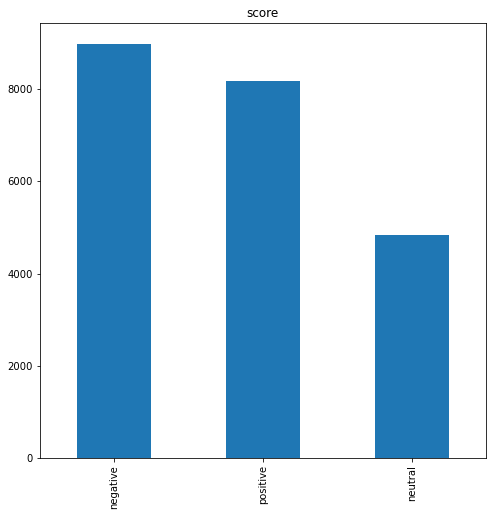

In [18]:
#Use bar chart to observe the frequencies of occerence of each of the three scores in the data
score_count =  cleanedTweet['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[8, 8])

<AxesSubplot:title={'center':'score'}, ylabel='score'>

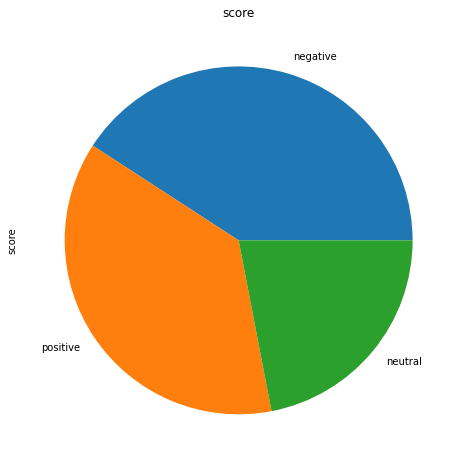

In [19]:
#Using pie chart to visualize the contribution of each of the scores in the data to the whole data
score_count.plot(kind="pie", y="score", title="score", x="", figsize=[8, 8])

In [21]:
#Plot The Word cloud
allWords = ' '.join( [twts for twts in df['original_text']] )
wordCloudd = WordCloud(width = 500, height = 400, random_state = 27, max_font_size = 119).genreate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined